In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import datetime 
import matplotlib
%matplotlib inline
import plotly
import plotly.plotly as py
import plotly.graph_objs as go

In [2]:
plotly.tools.set_credentials_file(username='izzymcclean', api_key='n384iOzk0Z6P6G3Hn5fl')

In [3]:
vehicle_data = pd.read_csv('database.csv')

In [4]:
vehicle_data.shape

(477732, 29)

In [5]:
vehicle_data = vehicle_data.loc[vehicle_data.LATITUDE.between(39, 42)]
vehicle_data = vehicle_data.loc[vehicle_data.LONGITUDE.between(-74, -72)]
vehicle_data.shape

(318990, 29)

**TIMES AND DATES ANALYSIS**

In [6]:
"""
Here we are turning what is the in the 'DATE' column into an actual datetime object.

We are then adding in another column so that we can know which day of the week the collisions happened on.
"""
vehicle_data['DATE'] = pd.to_datetime(vehicle_data['DATE'])

vehicle_data['DAY_OF_WEEK'] = vehicle_data['DATE'].dt.dayofweek

In [7]:
date_count = vehicle_data.groupby('DATE').DATE.count()
values = date_count.values
dates = date_count.index
data = [go.Bar(
            x=dates,y=values
    )]

py.iplot(data, filename = 'bar-plot')

High five! You successfully sent some data to your account on plotly. View your plot in your browser at https://plot.ly/~izzymcclean/0 or inside your plot.ly account where it is named 'bar-plot'


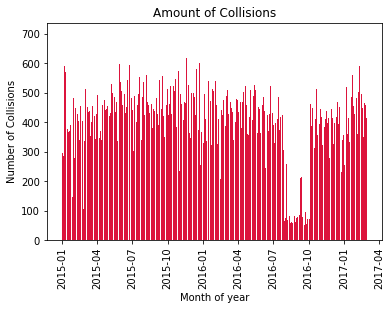

In [8]:
"""
Here we are grouping the collisions by month to see which month has the most. 
We do this by using the method .groupby and by creating a pandas series objects.
We then get the number of crashes by getting the values and the dates by getting 
the indexes. 
"""

date_count = vehicle_data.groupby('DATE').DATE.count()

values = date_count.values
dates = date_count.index
plt.xlabel('Month of year')
plt.ylabel('Number of Collisions')
plt.bar(dates, values,color = '#DC143C')
plt.title('Amount of Collisions')
plt.xticks(rotation='vertical')
plt.show()

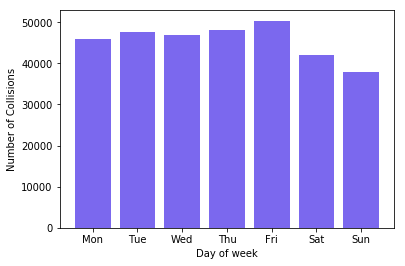

In [9]:
"""
Here we are exploring which day of the week had the most crashes. We used this again
by grouping the collisions and using the index and values of that object that is created
by the pandas method '.groupby'
"""

day_of_week_count = vehicle_data.groupby('DAY_OF_WEEK').DAY_OF_WEEK.count()
day_of_week = day_of_week_count.index
count = day_of_week_count.values
plt.xlabel('Day of week')
plt.ylabel('Number of Collisions')
plt.bar(day_of_week, count, color = '#7B68EE')
plt.xticks(day_of_week, ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])
plt.show()

In [10]:
day_of_week_count = vehicle_data.groupby('DAY_OF_WEEK').DAY_OF_WEEK.count()
day_of_week = day_of_week_count.index
count = day_of_week_count.values

data = [go.Bar(
            x=day_of_week, y=count
    )]

py.iplot(data, filename = 'weekday-plot')

In [11]:
vehicle_data['TIME']= pd.to_datetime(vehicle_data['TIME'])

(array([ 8735.,  5115.,  3920.,  3261.,  3857.,  4281.,  6745.,  9080.,
        18274., 17890., 16318., 17064., 17725., 18650., 21764., 19771.,
        23548., 22758., 20431., 16378., 13772., 11114., 10386.,  8153.]),
 array([ 0.        ,  0.95833333,  1.91666667,  2.875     ,  3.83333333,
         4.79166667,  5.75      ,  6.70833333,  7.66666667,  8.625     ,
         9.58333333, 10.54166667, 11.5       , 12.45833333, 13.41666667,
        14.375     , 15.33333333, 16.29166667, 17.25      , 18.20833333,
        19.16666667, 20.125     , 21.08333333, 22.04166667, 23.        ]),
 <a list of 24 Patch objects>)

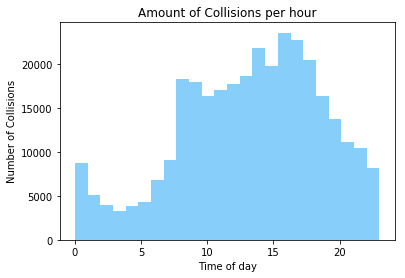

In [12]:
"""
Below we are plotting the number of collisions that happen at different 
times during the day. We do this by accessing the hour part of the time stamp 
in our data. We then use a histogram with 24 bins to display it. 
"""

plt.title('Amount of Collisions per hour')
plt.xlabel('Time of day')
plt.ylabel('Number of Collisions')
plt.hist([ts.hour for ts in vehicle_data.TIME], bins=24, color = '#87CEFA')

In [13]:
#vehicle_data['TIME_OF_DAY'] = [ts.time for ts in vehicle_data['TIME']]
#print(vehicle_data['TIME_OF_DAY'])

In [14]:
def map_to_quarter(time):
    minute = 0
    if time.minute < 7:
        minute = 0
    elif time.minute < 22:
        minute = 15
    elif time.minute < 37:
        minute = 30
    elif time.minute < 52:
        minute = 45
        
    return datetime.datetime(time.year, time.month, time.day, time.hour, minute)


def map_to_hour(time):
    minute = 0        
    return datetime.datetime(time.year, time.month, time.day, time.hour, minute)


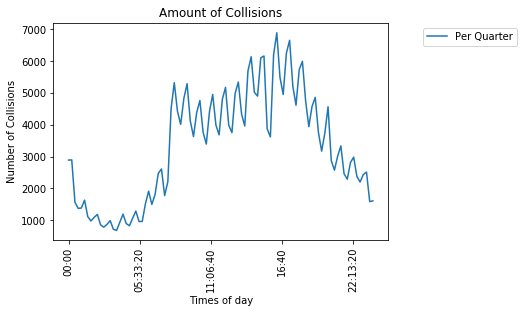

In [15]:
vehicle_data['QUARTERS'] = vehicle_data['TIME'].apply(map_to_quarter)

quarters_count = vehicle_data.groupby('QUARTERS').QUARTERS.count()
quarters = quarters_count.index
count = quarters_count.values
plt.plot(quarters.time, count, label='Per Quarter')
plt.xticks(rotation='vertical')
plt.legend(bbox_to_anchor=[1.4, 1])
plt.ylabel('Number of Collisions')
plt.title('Amount of Collisions')
plt.xlabel('Times of day')
plt.show()

In [16]:
vehicle_data['QUARTERS'] = vehicle_data['TIME'].apply(map_to_quarter)

quarters_count = vehicle_data.groupby('QUARTERS').QUARTERS.count()
quarters = quarters_count.index
count = quarters_count.values

trace = go.Scatter(
    x = quarters.time,
    y = count
)

data = [trace]
#data = [go.Scatter(
#            x=quarters,y=counts
#    )]

py.iplot(data, filename = 'quarters-plot')

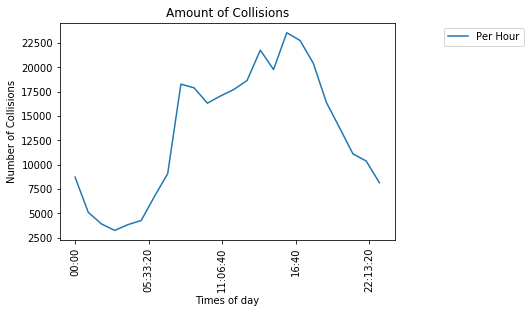

In [17]:
vehicle_data['HOURS'] = vehicle_data['TIME'].apply(map_to_hour)
hour_count = vehicle_data.groupby('HOURS').HOURS.count()
hours = hour_count.index
count = hour_count.values
plt.plot(hours.time, count, label='Per Hour')
plt.xticks(rotation='vertical')
plt.legend(bbox_to_anchor=[1.4, 1])
plt.title('Amount of Collisions')

plt.ylabel('Number of Collisions')
plt.xlabel('Times of day')
plt.show()

In [18]:
vehicle_data['HOURS'] = vehicle_data['TIME'].apply(map_to_hour)
hour_count = vehicle_data.groupby('HOURS').HOURS.count()
hours = hour_count.index
count = hour_count.values

trace = go.Scatter(
    x = hours.time,
    y = count
)

data = [trace]
#data = [go.Scatter(
#            x=quarters,y=counts
#    )]

py.iplot(data, filename = 'hours-plot')

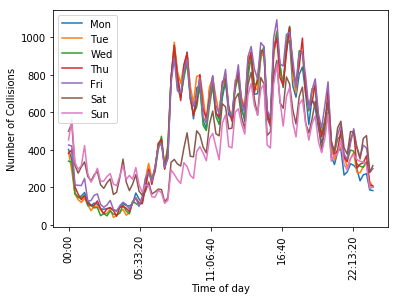

In [19]:
days = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
for day in range(7):
    quarters_count = vehicle_data.loc[vehicle_data.DAY_OF_WEEK == day].groupby('QUARTERS').QUARTERS.count()

    quarters = quarters_count.index
    count = quarters_count.values
    plt.xlabel('Time of day')
    plt.ylabel('Number of Collisions')
    plt.plot(quarters.time, count, label=days[day])
    plt.xticks(rotation='vertical')

plt.legend()

In [20]:
days = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
#n=0
for day in range(7):
    quarters_count = vehicle_data.loc[vehicle_data.DAY_OF_WEEK == day].groupby('QUARTERS').QUARTERS.count()
    
    quarters = quarters_count.index
    count = quarters_count.values
    data.append(go.Scatter(x = quarters.time, y = count, mode = 'lines'))
    #days[n]= go.Scatter(
    #x = quarters.time, y = count, mode = 'lines')
    #data= []
    #data.append(days[n])
    #n+=1



py.iplot(data[1:8], filename = 'day-plot')
    
    #plt.plot(quarters.time, count, label=days[day])
    #plt.xticks(rotation='vertical')
    

**LOCATION ANALYSIS**

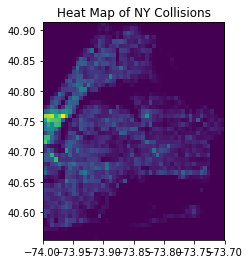

In [21]:
#data = vehicle_data[:1500]
lon = vehicle_data['LONGITUDE']
lon = lon.dropna()

lat = vehicle_data['LATITUDE']
lat = lat.dropna()


heatmap, xedges, yedges = np.histogram2d(lon, lat, bins = 50)
extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]

plt.clf()
plt.imshow(heatmap.T, extent= extent, origin = 'lower')
plt.title('Heat Map of NY Collisions')
plt.show()

In [22]:
vehicle_data1 = vehicle_data[:1500]
latitudes = vehicle_data1['LATITUDE']
latitudes = latitudes.dropna()
longitudes = vehicle_data1['LONGITUDE']
longitudes = longitudes.dropna()

**CREATING HEAT MAPS**

In [23]:
import folium

In [24]:
#vehicle_data1 = vehicle_data[:1500]

In [25]:
NYmap = folium.Map(location=[40.785091, -73.968285],
                    zoom_start = 11)

In [26]:
from folium import plugins
from folium.plugins import HeatMap

In [27]:
heat_data = [[row['LATITUDE'],row['LONGITUDE']] for index, row in vehicle_data.iterrows()]

# Plot it on the map
HeatMap(heat_data, radius = 15).add_to(NYmap)

In [28]:
NYmap.save("NYMap.html")

In [29]:
NYmap2 = folium.Map(location=[40.785091, -73.968285],
                    zoom_start = 11)

In [30]:
people_injured = vehicle_data.loc[vehicle_data['PERSONS INJURED'] > 0]
heat_data2 = [[row['LATITUDE'],row['LONGITUDE']] for index, row in people_injured.iterrows()]

# Plot it on the map
HeatMap(heat_data2, radius = 15).add_to(NYmap2)

In [31]:
NYmap2.save("people_injured.html")

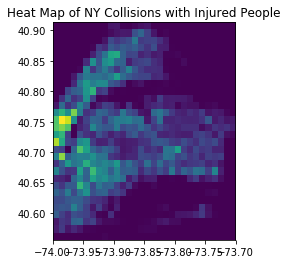

In [32]:
people_injured = vehicle_data.loc[vehicle_data['PERSONS INJURED'] > 0]
lon = people_injured['LONGITUDE']
#lon = lon.dropna()
lat = people_injured['LATITUDE']
#lat = lat.dropna()

heatmap, xedges, yedges = np.histogram2d(lon, lat, bins=30)
extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]

plt.clf()
plt.imshow(heatmap.T, extent=extent, origin='lower')
plt.title('Heat Map of NY Collisions with Injured People')
plt.show()

**MOST DANGEROUS STREETS**

In [33]:
streets = vehicle_data.groupby('ON STREET NAME')['ON STREET NAME']
count = streets.count()
amount_of_crashes = len(vehicle_data.index)
count.sort_values(ascending=False, inplace=True)
freq_streets = count.index[:10]
print(count[:10])

ON STREET NAME
BROADWAY              3361
ATLANTIC AVENUE       3252
NORTHERN BOULEVARD    2412
3 AVENUE              1966
LINDEN BOULEVARD      1899
FLATBUSH AVENUE       1865
2 AVENUE              1857
QUEENS BOULEVARD      1737
5 AVENUE              1378
NOSTRAND AVENUE       1351
Name: ON STREET NAME, dtype: int64


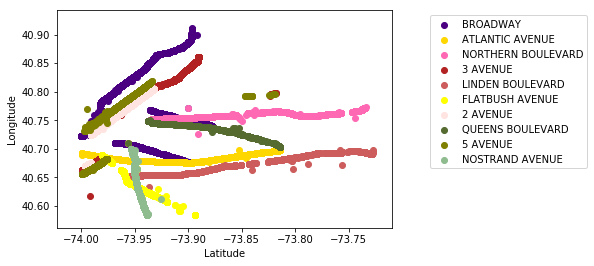

In [34]:
i = 0
lons = []
lats = []
for hex in matplotlib.colors.cnames:
    street = freq_streets[i]
    lon = vehicle_data.loc[(vehicle_data['ON STREET NAME']==street) | (vehicle_data['CROSS STREET NAME']==street)].LONGITUDE.dropna().values
    lat = vehicle_data.loc[(vehicle_data['ON STREET NAME']==street) | (vehicle_data['CROSS STREET NAME']==street)].LATITUDE.dropna().values
    lons.extend(lon)
    lats.extend(lat)
    #heat_data1 = [[lat[i],lon[i]] for i in range(0, len(lon))]
    #HeatMap(heat_data1).add_to(map_hooray2)
    plt.xlabel('Latitude')
    plt.ylabel('Longitude')
    plt.scatter(lon, lat, color=hex, label=street)
    i += 1
    if i==len(freq_streets):
        break

plt.legend(bbox_to_anchor=[1.6, 1])
plt.show()

**MAJOR CAUSES OF ACCIDENTS**

In [35]:
injured = [x for x in vehicle_data.columns if 'INJURED' in x]
killed = [x for x in vehicle_data.columns if 'KILLED' in x]
vehicle_data['severity'] = 'No injuries' 
vehicle_data.loc[vehicle_data[killed].sum(axis=1)>0,'severity'] = 'Fatal'
vehicle_data.loc[(vehicle_data[killed].sum(axis=1)==0)&(vehicle_data[injured].sum(axis=1)>0),'severity'] = 'Injured'
vehicle_data.severity.value_counts()

No injuries    260309
Injured         58387
Fatal             294
Name: severity, dtype: int64

Text(0.5,0,'# reported')

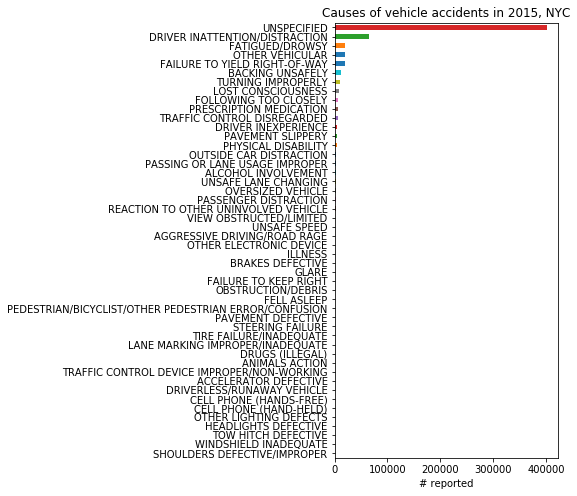

In [36]:
factors = [x for x in vehicle_data.columns if 'FACTOR' in x]
fig, ax = plt.subplots(figsize=(4,8))
d = vehicle_data.copy()
d = pd.DataFrame([d.loc[:,x].value_counts() for x in factors]).fillna(0).sum().sort_values(ascending=True)
d.plot(kind='barh',ax=ax)
ax.set_title('Causes of vehicle accidents in 2015, NYC')
ax.set_xlabel('# reported')

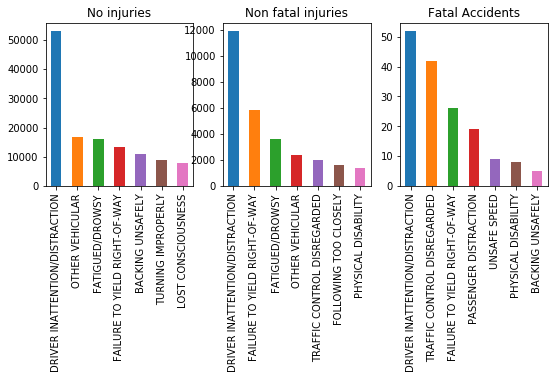

In [37]:
factors = [x for x in vehicle_data.columns if 'FACTOR' in x]
d = vehicle_data[factors].join(vehicle_data.severity)
s0 = pd.DataFrame([d.loc[d.severity=='No injuries',x].value_counts() for x in factors]).fillna(0).sum().sort_values(ascending=False)
s1 = pd.DataFrame([d.loc[d.severity=='Injured',x].value_counts() for x in factors]).fillna(0).sum().sort_values(ascending=False)
s2 = pd.DataFrame([d.loc[d.severity=='Fatal',x].value_counts() for x in factors]).fillna(0).sum().sort_values(ascending=False)

fig = plt.figure(figsize=(9,3))
ax = fig.add_subplot(131 )
ax.set_title('No injuries')
s0[1:8].plot(kind='bar',ax=ax)
ax = fig.add_subplot(132 )
ax.set_title('Non fatal injuries')
s1[1:8].plot(kind='bar',ax=ax)
ax = fig.add_subplot(133 )
ax.set_title('Fatal Accidents')
s2[1:8].plot(kind='bar',ax=ax)

**VEHICLE TYPES**

Text(0.5,0,'# reported')

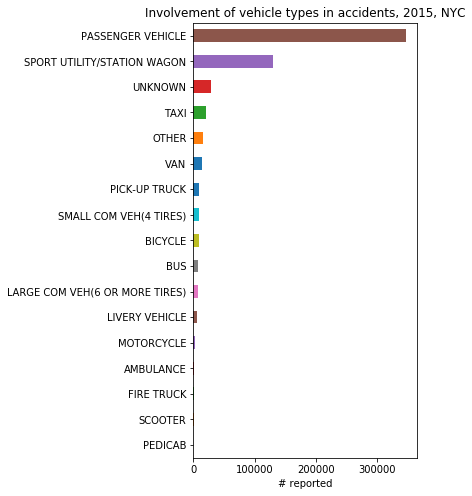

In [38]:
vehicle_types = [x for x in vehicle_data.columns if 'TYPE' in x]
fig, ax = plt.subplots(figsize=(4,8))
d = vehicle_data.copy()
d = pd.DataFrame([d.loc[:,x].value_counts() for x in vehicle_types]).fillna(0).sum().sort_values(ascending=True)
d.plot(kind='barh',ax=ax)
ax.set_title('Involvement of vehicle types in accidents, 2015, NYC')
ax.set_xlabel('# reported')

In [39]:
vehicle_types = [x for x in vehicle_data.columns if 'TYPE' in x]
d = vehicle_data.copy()
d = pd.DataFrame([d.loc[:,x].value_counts() for x in vehicle_types]).fillna(0).sum().sort_values(ascending=True)
print("Ratio of taxis to normal cars involved in accidents: 1:{} ".format(int(d['PASSENGER VEHICLE']/d.TAXI)))

Ratio of taxis to normal cars involved in accidents: 1:16 


**TRYING TO MAKE GRAPH LINKS **

In [40]:
vehicle_types = [x for x in vehicle_data.columns if 'TYPE' in x]

In [41]:
len(vehicle_types)

5

In [42]:
type_data = vehicle_data[vehicle_types[:5]]

In [43]:
type_data = pd.DataFrame(type_data)

In [44]:
type_data = type_data.dropna()

In [45]:
import networkx as nx
PG = nx.MultiDiGraph()

import matplotlib.pyplot as plt
import os

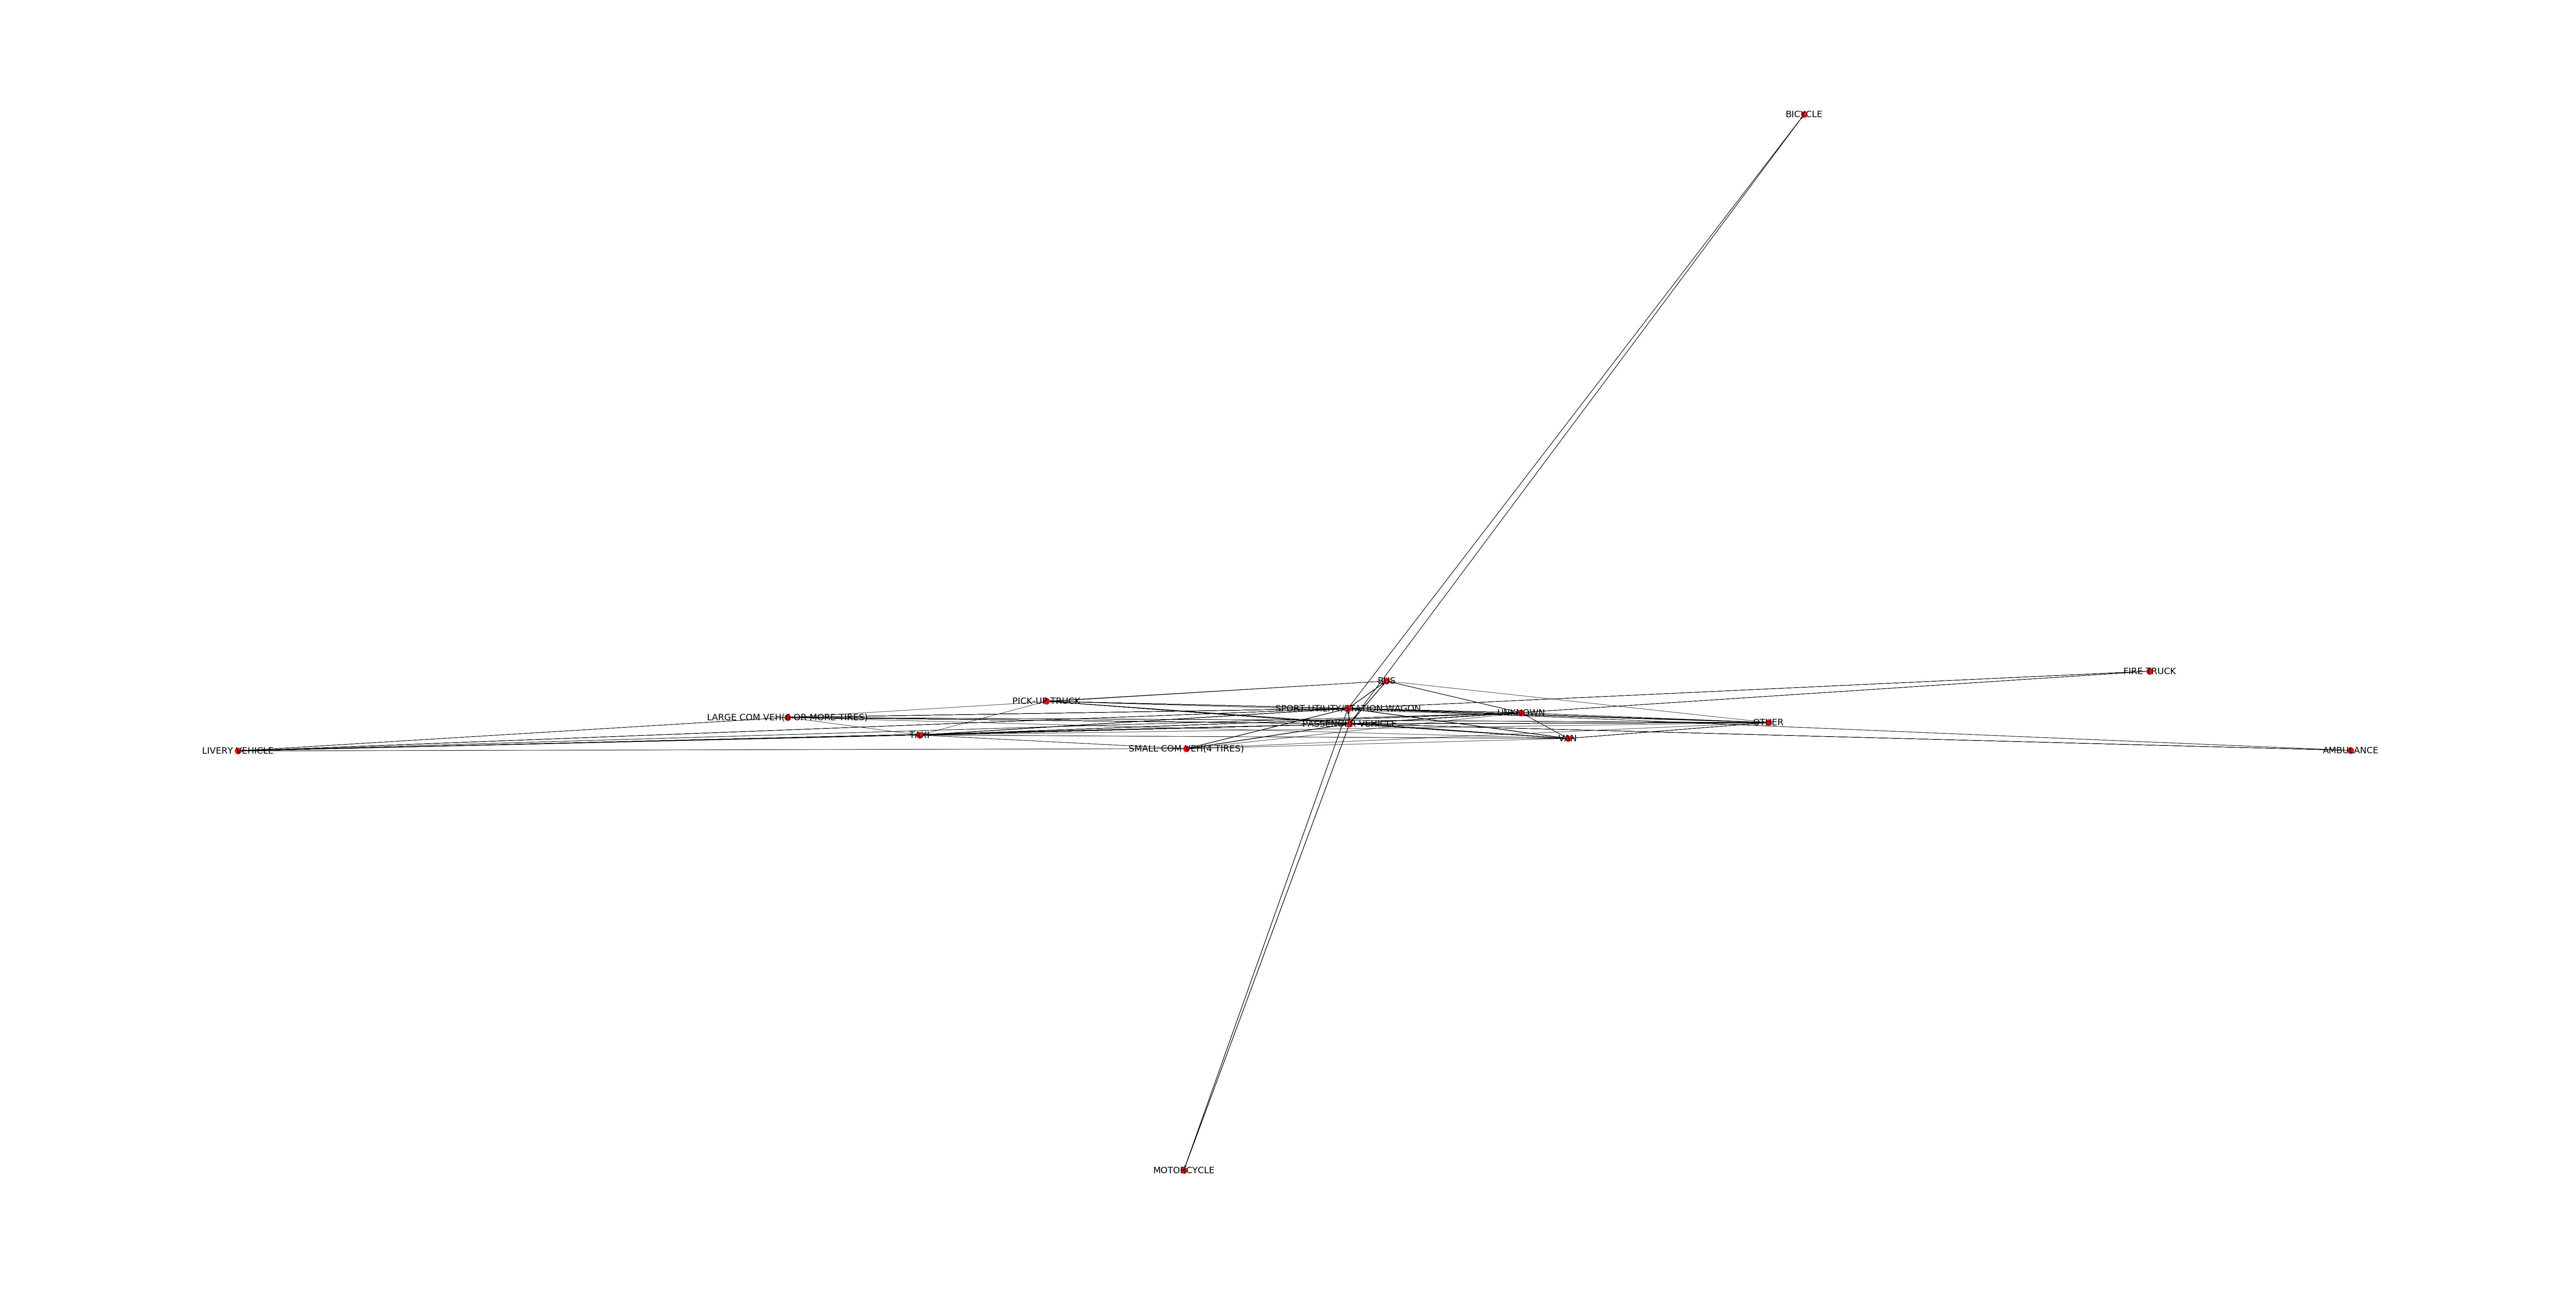

In [46]:
#def get_links(type_car): 
labels = {}
for index, row in type_data.iterrows():
    #if type_car in row: 
    #node = row[type_car]
    labels[row[0]] = row[0]
    PG.add_node(row[0])
    for n in range(1, len(row)):
        PG.add_node(row[n])
        labels[row[n]] = row[n]
        PG.add_edge(row[0], row[n])

pos = nx.spring_layout(PG)
plt.figure(3,figsize=(100,50)) 
nx.draw(PG,pos)
nx.draw_networkx_labels(PG,pos,labels,font_size=25)
#plt.savefig("graph.png", dpi=1000)
plt.savefig("graph.pdf")
plt.show()   


In [47]:
get_links('PASSENGER VEHICLE')

NameError: name 'get_links' is not defined

In [ ]:
get_links('TAXI')

In [ ]:
nodes = PG.nodes()
edges = PG.edges()

degreeSum = 0
for node in nodes:
    currentDegree = PG.degree(node)
    degreeSum += currentDegree
    
avgDegree = float(degreeSum)/len(nodes)
        
print len(nodes)
print len(edges)
print avgDegree